In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os 
import sys
from os import listdir
import glob
from PIL import Image
from numpy import asarray
from numpy import loadtxt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
!unzip COM2028_2023.zip

Streaming output truncated to the last 5000 lines.
  inflating: test/04354.jpg          
  inflating: test/02725.jpg          
  inflating: test/00132.jpg          
  inflating: test/00654.jpg          
  inflating: test/02043.jpg          
  inflating: test/04432.jpg          
  inflating: test/02057.jpg          
  inflating: test/04426.jpg          
  inflating: test/03349.jpg          
  inflating: test/00640.jpg          
  inflating: test/00898.jpg          
  inflating: test/01238.jpg          
  inflating: test/00126.jpg          
  inflating: test/04340.jpg          
  inflating: test/02731.jpg          
  inflating: test/01210.jpg          
  inflating: test/03407.jpg          
  inflating: test/04368.jpg          
  inflating: test/02719.jpg          
  inflating: test/03361.jpg          
  inflating: test/00668.jpg          
  inflating: test/01576.jpg          
  inflating: test/01562.jpg          
  inflating: test/03375.jpg          
  inflating: test/03413.jpg          

In [2]:
raw_train = loadtxt("train.txt", dtype='str', comments="#", delimiter=" ", unpack=False)
train_targets = []
for x in range(10000):
    train_targets.append(raw_train[x][1])

In [3]:
train = []
test = []
from matplotlib.image import imread
for file in sorted(os.listdir("train")):
    img = imread("/content/train/" + file)
    train.append(img)
for file in sorted(os.listdir("test")):
    img = imread("/content/test/" + file)
    test.append(img)
real_train = np.array(train)
real_test = np.array(test)
y_train = np.array(train_targets)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
x_train = real_train.flatten().reshape(10000, 2352)
x_test = real_test.flatten().reshape(5000, 2352)
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=99)
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=99, weights='distance')

In [5]:
from sklearn.model_selection import cross_val_score

cross_val_score(knn_clf, x_train, y_train, cv=5, scoring="accuracy")

array([0.733 , 0.7305, 0.739 , 0.7355, 0.7405])

In [7]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(knn_clf, x_train, y_train, cv=5)
conf_mx = confusion_matrix(y_train, y_train_pred)
print("KNN Classification Report: \n", classification_report(y_train, y_train_pred))

KNN Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.38      0.49       708
           1       0.72      0.86      0.78      1809
           2       0.75      0.68      0.71       916
           3       0.61      0.62      0.62      1687
           4       0.69      0.75      0.72       716
           5       0.50      0.71      0.59       819
           6       0.91      0.70      0.79      1969
           7       0.93      0.99      0.96      1376

    accuracy                           0.74     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.75      0.74      0.73     10000



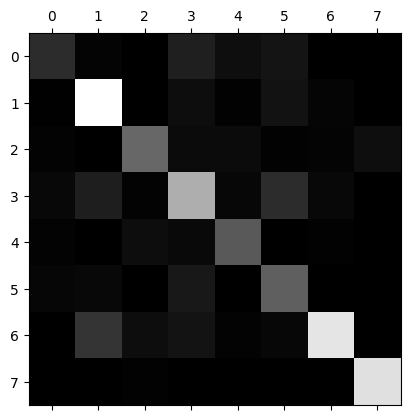

array([[ 272,   30,    2,  193,   86,  124,    0,    1],
       [   8, 1547,    6,   82,   15,  113,   34,    4],
       [  19,    5,  623,   70,   72,   13,   25,   89],
       [  51,  185,   24, 1053,   47,  273,   54,    0],
       [  20,    1,   79,   56,  540,    1,   17,    2],
       [  37,   53,    0,  148,    1,  578,    2,    0],
       [   0,  324,   79,  115,   20,   44, 1385,    2],
       [   0,    0,   16,    0,    0,    0,    1, 1359]])

In [8]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()
conf_mx

In [9]:
#Multinomial class regression
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(random_state=42, max_iter = 1000)
x_training, x_val, y_training, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
softmax_reg.fit(x_training, y_training)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

0.785
0.964


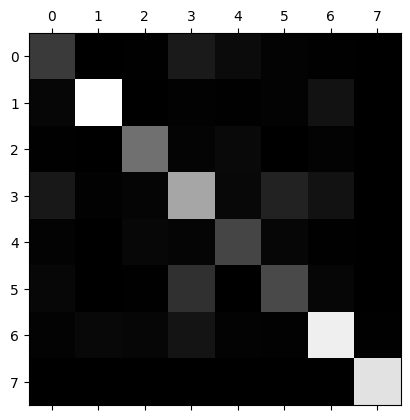

Logistic Regression Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.56      0.56       135
           1       0.95      0.89      0.92       375
           2       0.83      0.85      0.84       173
           3       0.61      0.64      0.62       339
           4       0.66      0.73      0.70       124
           5       0.60      0.53      0.56       182
           6       0.82      0.84      0.83       374
           7       0.99      0.99      0.99       298

    accuracy                           0.79      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.79      0.79      0.79      2000



In [10]:
y_predict = softmax_reg.predict(x_val)
score = softmax_reg.score(x_val, y_val)
print(score)
score2 = softmax_reg.score(x_training, y_training)
print(score2)
conf_mx2 = confusion_matrix(y_val, y_predict)
plt.matshow(conf_mx2, cmap=plt.cm.gray)
plt.show()
conf_mx2
print("Logistic Regression Classification Report: \n", classification_report(y_val, y_predict))

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import regularizers

In [12]:
x_training, x_val, y_training, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
y_train_nn = keras.utils.to_categorical(y_training, 8)
y_val_nn = keras.utils.to_categorical(y_val, 8)
print(x_training.shape)
print(x_val.shape)
print(y_train_nn.shape)
print(y_val_nn.shape)

(8000, 2352)
(2000, 2352)
(8000, 8)
(2000, 8)


In [13]:
n_inputs = 28*28*3  
n_hidden1 = 2352
n_hidden2 = 2352/2
n_hidden3 = 2352/2/2
n_hidden4 = 2352/2/2/2
n_outputs = 8
# Create the model
MLP = keras.Sequential(
    [
        keras.Input(shape=(n_inputs,)),
        layers.Dense(n_hidden1, name='hidden1', activation='relu', ),
        layers.Dense(n_hidden2, name='hidden2', activation='relu', ),
        layers.Dense(n_hidden3, name='hidden3', activation='relu',),
        layers.Dense(n_hidden4, name='hidden4', activation='relu', ),
        layers.Dense(n_outputs, activation="softmax")
    ]
)

# Print model summary
MLP.summary()

crossentropy = keras.losses.CategoricalCrossentropy()
learning_rate = 0.0001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
accuracy = keras.metrics.CategoricalAccuracy()
MLP.compile(loss=crossentropy, optimizer=optimizer, metrics=[accuracy])
MLP_history = MLP.fit(x_training, y_train_nn, batch_size=64, epochs=50, class_weight = {0: 2.77777777778, 1: 1., 2: 2.1676300578, 3: 1.10619469027, 4: 3.02419354839, 5: 2.06043956044, 6: 1.00267379679, 7: 1.25838926174},validation_data = (x_val,y_val_nn))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 2352)              5534256   
                                                                 
 hidden2 (Dense)             (None, 1176)              2767128   
                                                                 
 hidden3 (Dense)             (None, 588)               692076    
                                                                 
 hidden4 (Dense)             (None, 294)               173166    
                                                                 
 dense (Dense)               (None, 8)                 2360      
                                                                 
Total params: 9,168,986
Trainable params: 9,168,986
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
125/125 [==========================

In [14]:
#MLP
MLP.save('MLP.h5')

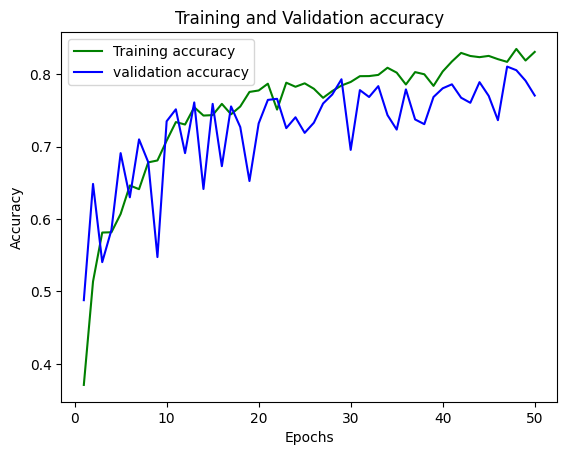

In [15]:
import matplotlib.pyplot as plt
loss_train = MLP_history.history['categorical_accuracy']
loss_val = MLP_history.history['val_categorical_accuracy']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

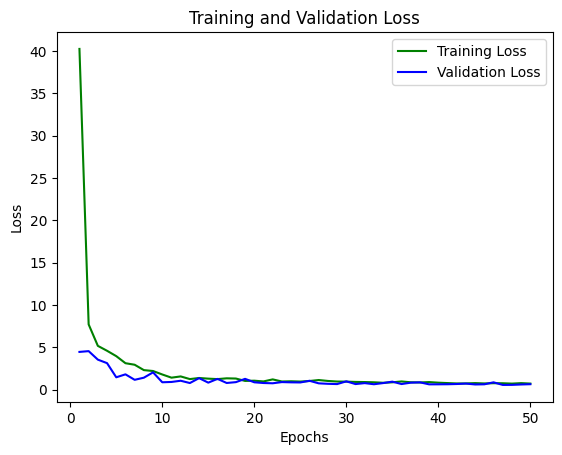

In [16]:
import matplotlib.pyplot as plt
loss_train = MLP_history.history['loss']
loss_val = MLP_history.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training Loss')
plt.plot(epochs, loss_val, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

63/63 [==============================] - 0s 2ms/step
2000
Total accuracy on the test set: 0.7705


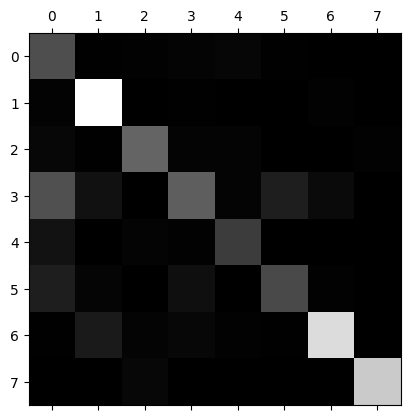

array([[112,   2,   3,   7,   9,   2,   0,   0],
       [  5, 363,   0,   2,   1,   0,   4,   0],
       [ 10,   2, 142,   7,   6,   1,   1,   4],
       [114,  25,   1, 134,   7,  43,  15,   0],
       [ 26,   1,   6,   4,  86,   1,   0,   0],
       [ 43,   8,   0,  22,   0, 105,   4,   0],
       [  2,  37,   7,  11,   3,   2, 312,   0],
       [  0,   0,  11,   0,   0,   0,   0, 287]])

In [17]:
y_pred = MLP.predict(x_val)
y_pred = np.argmax(y_pred, axis=1)
print(len(y_pred))
y_test_argmax2 = np.argmax(y_val_nn, axis=1)
precision2 = keras.metrics.Accuracy()
precision2.update_state(y_test_argmax2, y_pred)
print("Total accuracy on the test set:", precision2.result().numpy())
conf_mx3 = confusion_matrix(y_test_argmax2, y_pred)
plt.matshow(conf_mx3, cmap=plt.cm.gray)
plt.show()
conf_mx3

In [18]:
print("MLP Classification Report: \n", classification_report(y_test_argmax2, y_pred))


MLP Classification Report: 
               precision    recall  f1-score   support

           0       0.36      0.83      0.50       135
           1       0.83      0.97      0.89       375
           2       0.84      0.82      0.83       173
           3       0.72      0.40      0.51       339
           4       0.77      0.69      0.73       124
           5       0.68      0.58      0.62       182
           6       0.93      0.83      0.88       374
           7       0.99      0.96      0.97       298

    accuracy                           0.77      2000
   macro avg       0.76      0.76      0.74      2000
weighted avg       0.80      0.77      0.77      2000



In [19]:
X_NN_train = real_train.reshape(10000,28,28,3)
X_NN_train = X_NN_train/255
from keras.utils import to_categorical
y_NN_train = to_categorical(y_train)
X_NN_train, X_NN_val, y_NN_train, y_NN_val = train_test_split(X_NN_train, y_NN_train, test_size=0.2, random_state=42)

In [20]:
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, ReLU, Dropout

def create_model():
    CNN = Sequential()
    CNN.add(Conv2D(32, kernel_size=3, padding = "same", activation=None, input_shape=(28,28,3)))
    CNN.add(BatchNormalization())
    CNN.add(ReLU())
    CNN.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
    CNN.add(Conv2D(64, kernel_size=5, padding = "same",activation="relu"))
    CNN.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
    CNN.add(Conv2D(128, kernel_size=3, padding = "same",activation="relu"))
    CNN.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
    CNN.add(Flatten())
    CNN.add(Dense(8, activation="softmax"))
    
    return CNN

In [21]:
CNN = create_model()
crossentropy = keras.losses.CategoricalCrossentropy()
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
accuracy = keras.metrics.CategoricalAccuracy()
CNN.compile(loss=crossentropy, optimizer=optimizer, metrics=[accuracy])
history = CNN.fit(X_NN_train, y_NN_train, validation_data = (X_NN_val,y_NN_val), epochs=30,class_weight = {0: 2.77777777778, 1: 1., 2: 2.1676300578, 3: 1.10619469027, 4: 3.02419354839, 5: 2.06043956044, 6: 1.00267379679, 7: 1.25838926174}, batch_size=64) 

Epoch 1/30
125/125 [==============================] - 9s 12ms/step - loss: 1.5748 - categorical_accuracy: 0.6288 - val_loss: 1.7908 - val_categorical_accuracy: 0.2730
Epoch 2/30
125/125 [==============================] - 1s 7ms/step - loss: 0.8072 - categorical_accuracy: 0.8199 - val_loss: 1.1994 - val_categorical_accuracy: 0.6325
Epoch 3/30
125/125 [==============================] - 1s 6ms/step - loss: 0.5846 - categorical_accuracy: 0.8704 - val_loss: 0.5441 - val_categorical_accuracy: 0.8740
Epoch 4/30
125/125 [==============================] - 1s 6ms/step - loss: 0.4614 - categorical_accuracy: 0.8970 - val_loss: 0.4244 - val_categorical_accuracy: 0.8635
Epoch 5/30
125/125 [==============================] - 1s 6ms/step - loss: 0.3883 - categorical_accuracy: 0.9112 - val_loss: 0.4345 - val_categorical_accuracy: 0.8375
Epoch 6/30
125/125 [==============================] - 1s 6ms/step - loss: 0.3467 - categorical_accuracy: 0.9191 - val_loss: 0.3072 - val_categorical_accuracy: 0.8900
Epo

In [22]:
#CNN
CNN.save('CNN.h5')

63/63 [==============================] - 0s 2ms/step
Total accuracy on the test set: 0.923


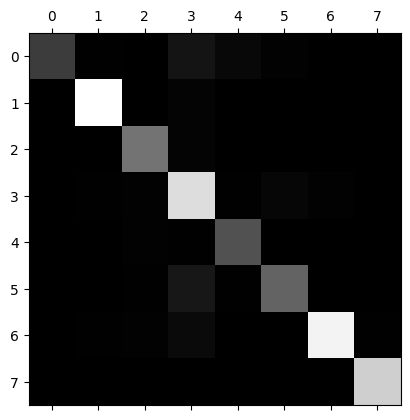

array([[ 87,   2,   1,  30,  12,   3,   0,   0],
       [  0, 367,   0,   7,   0,   0,   1,   0],
       [  0,   0, 165,   7,   1,   0,   0,   0],
       [  1,   2,   3, 318,   2,   9,   4,   0],
       [  1,   0,   3,   2, 117,   1,   0,   0],
       [  0,   1,   2,  34,   2, 143,   0,   0],
       [  0,   2,   3,  15,   1,   0, 351,   2],
       [  0,   0,   0,   0,   0,   0,   0, 298]])

In [23]:
from sklearn.metrics import confusion_matrix
y_model_2 = CNN.predict(X_NN_val)
y_model_2 = np.argmax(y_model_2, axis=1)
y_test_argmax2 = np.argmax(y_NN_val, axis=1)
precision2 = keras.metrics.Accuracy()
precision2.update_state(y_test_argmax2, y_model_2)
print("Total accuracy on the test set:", precision2.result().numpy())
conf_mx4 = confusion_matrix(y_test_argmax2, y_model_2)
plt.matshow(conf_mx4, cmap=plt.cm.gray)
plt.show()
conf_mx4

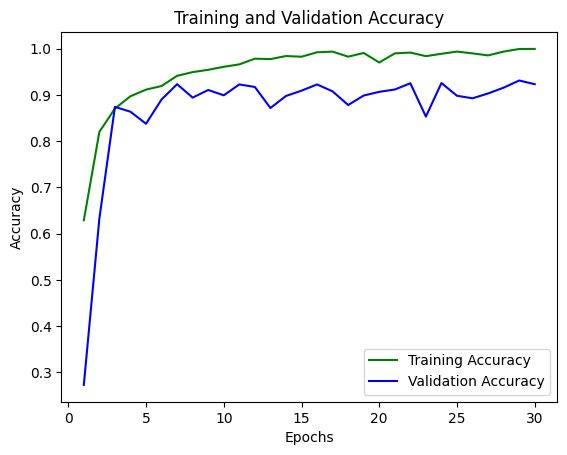

In [24]:
import matplotlib.pyplot as plt
loss_train = history.history['categorical_accuracy']
loss_val = history.history['val_categorical_accuracy']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training Accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

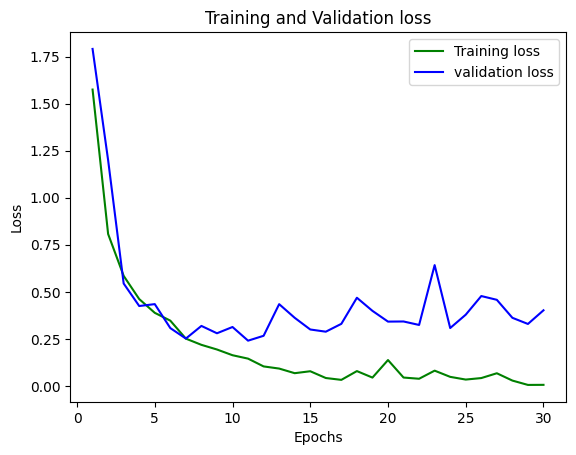

In [25]:

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
print("CNN Classification Report: \n", classification_report(y_test_argmax2, y_model_2))

CNN Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.64      0.78       135
           1       0.98      0.98      0.98       375
           2       0.93      0.95      0.94       173
           3       0.77      0.94      0.85       339
           4       0.87      0.94      0.90       124
           5       0.92      0.79      0.85       182
           6       0.99      0.94      0.96       374
           7       0.99      1.00      1.00       298

    accuracy                           0.92      2000
   macro avg       0.93      0.90      0.91      2000
weighted avg       0.93      0.92      0.92      2000



In [27]:
x_test = real_test.reshape(5000,28,28,3)
x_test = x_test/255
y_test = CNN.predict(x_test)
y_test = np.argmax(y_test, axis=1)
print(y_test)

157/157 [==============================] - 1s 3ms/step
[1 3 6 ... 2 4 2]


In [28]:
i = 0
text_file2 = []
for file in sorted(os.listdir("test")):
    text_file2.append(file + " " + str(y_test[i]))

In [29]:
i = 0
text_file = []
for file in sorted(os.listdir("test")):
    text_file.append(file + " " + str(y_test[i]))
    i+=1
with open('test.txt', 'w') as writefile:
  for string in text_file:
    writefile.write("test/" + string + '\n')

In [30]:
print(text_file)

['00000.jpg 1', '00001.jpg 3', '00002.jpg 6', '00003.jpg 3', '00004.jpg 7', '00005.jpg 3', '00006.jpg 3', '00007.jpg 0', '00008.jpg 7', '00009.jpg 2', '00010.jpg 1', '00011.jpg 1', '00012.jpg 6', '00013.jpg 3', '00014.jpg 6', '00015.jpg 2', '00016.jpg 3', '00017.jpg 6', '00018.jpg 6', '00019.jpg 7', '00020.jpg 7', '00021.jpg 0', '00022.jpg 3', '00023.jpg 2', '00024.jpg 4', '00025.jpg 6', '00026.jpg 0', '00027.jpg 0', '00028.jpg 4', '00029.jpg 1', '00030.jpg 3', '00031.jpg 1', '00032.jpg 1', '00033.jpg 4', '00034.jpg 3', '00035.jpg 6', '00036.jpg 2', '00037.jpg 2', '00038.jpg 1', '00039.jpg 7', '00040.jpg 7', '00041.jpg 2', '00042.jpg 2', '00043.jpg 7', '00044.jpg 4', '00045.jpg 5', '00046.jpg 4', '00047.jpg 1', '00048.jpg 6', '00049.jpg 6', '00050.jpg 1', '00051.jpg 3', '00052.jpg 6', '00053.jpg 1', '00054.jpg 2', '00055.jpg 1', '00056.jpg 4', '00057.jpg 4', '00058.jpg 6', '00059.jpg 6', '00060.jpg 4', '00061.jpg 6', '00062.jpg 7', '00063.jpg 3', '00064.jpg 5', '00065.jpg 1', '00066.jp

In [31]:
print(os.listdir())

['.config', 'COM2028_2023.zip', 'test', 'train', '__MACOSX', 'CNN.h5', 'MLP.h5', 'test.txt', 'train.txt', 'sample_data']
